## Cavapa Data Processing

This script is written to assist in the validation study of CAVAPA. CAVAPA is a tool for Computer Assisted Video Analysis of Physical Activity.

<https://cavapa.ruthenbeck.io>

CAVAPA is a project at Finland's JYU university with Heidi Pasi and the 
FidiPro team with Prof. Taru Lintunen and Prof. Martin Hagger
Greg Ruthenbeck. 19.5.21

CAVAPA data is compared with other data:
Heart-Rate, Accelerometer, and manually observed (SOPLAY)

Import the `cavapa.py` python helpers.

In [18]:
from cavapa import *

### Indoor (Gym)

#### Pre-process Heart-rate data 

Copy data from personal recordings into a single CSV with 1 column for each person.

In [19]:
gymHrData = {}
for i in range(1,8): # 7 good data files. 1 not available
 	data = getScoresFromTimeLevels(readHeartRateRawCSV(f'input/person{i}.csv'))
 	data = downSample(data, 10) # convert 1Hz to 0.1Hz
 	gymHrData[f'Person{i}'] = data[:120]
writeDictToCSV('output/gym-hr.csv', 'CAVAPA JYU. Greg Ruthenbeck. 20min @0.1Hz (10s intervals).', gymHrData)

#### Read Observational Scores from CSV

- Sampling rate: `0.1Hz (10s intervals)`
- Example of CSV row: `10,00:01:40,0.1.2.1`, the 10th sample, time, count of 0 people activity-level-1, 1 at level #2, etc

In [20]:
# 0.1Hz (10s intervals)
gymHrData = readHeartRateCSV('output/gym-hr.csv')
# 0.1Hz (10s intervals)
gymObsData1 = getScoresFromTimeLevels(readTimeLevelsCSV('input/gym-observed1.csv'))
# Read and convert CSV-file's 0.2Hz (5s intervals) to 0.1Hz (10s intervals)
gymObsData2 = downSample(readSimpleCSV('input/gym-obs2-5s.csv'), 2)
gymAccData  = downSample(readSimpleCSV('input/gym-acc-5s.csv'), 2)
# Read and convert 25Hz (25fps) to 0.1Hz (10s interval)
gymCavData = getScoresFromTimeLevels(readSimpleCSV('input/gym-cavapa-cameraA.csv', 25, 10))
gymData = {
	'Obs1': gymObsData1,
	'Obs2': gymObsData2,
	'Acc': 	gymAccData,
	'HR': 	gymHrData,
	'Cav': 	gymCavData
}
gymData = trimToSameLen(gymData)
writeDictToCSV('output/gym.csv', 'CAVAPA JYU. Greg Ruthenbeck. 20min @0.1Hz (10s intervals).', gymData)
print('Gym Correlations, Pearsons, Spearmans')
printCorrelation({ k: gymData[k] for k in ['Obs1', 'Obs2'] })
printCorrelation({ k: gymData[k] for k in ['Obs1', 'Acc'] })
printCorrelation({ k: gymData[k] for k in ['Obs2', 'Acc'] })
printCorrelation({ k: gymData[k] for k in ['Obs1', 'HR'] })
printCorrelation({ k: gymData[k] for k in ['Obs2', 'HR'] })
printCorrelation({ k: gymData[k] for k in ['Acc', 'Cav'] })
printCorrelation({ k: gymData[k] for k in ['HR', 'Cav'] })
printCorrelation({ k: gymData[k] for k in ['Obs1', 'Cav'] })
printCorrelation({ k: gymData[k] for k in ['Obs2', 'Cav'] })

Gym Correlations, Pearsons, Spearmans
Obs1-Obs2, 	0.91, 0.88
Obs1-Acc, 	0.91, 0.88
Obs2-Acc, 	0.92, 0.95
Obs1-HR, 	0.71, 0.66
Obs2-HR, 	0.77, 0.76
Acc-Cav, 	0.64, 0.68
HR-Cav, 	0.49, 0.53
Obs1-Cav, 	0.75, 0.72
Obs2-Cav, 	0.76, 0.74


Generate the charts

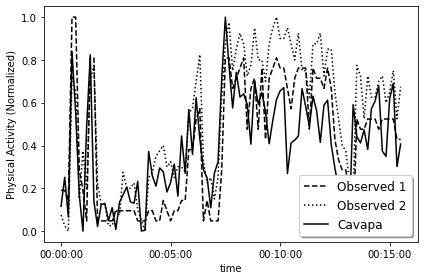

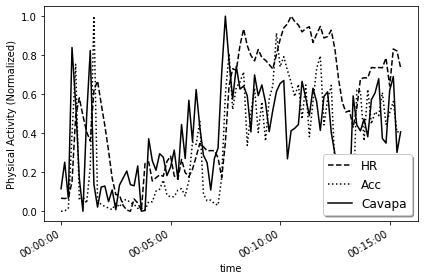

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

fig, axs = plt.subplots(1, 1)
t = pd.date_range('2020-01-01', periods=len(gymData['Obs1']), freq='10s')
axs.plot(t, normalize(gymData['Obs1'],0,1), 'k--', label='Observed 1')
axs.plot(t, normalize(gymData['Obs2'],0,1), 'k:', label='Observed 2')
axs.plot(t, normalize(gymData['Cav'],0,1), 'k', label='Cavapa')
axs.set_xlabel('time')
axs.set_ylabel('Physical Activity (Normalized)')
xfmt = mdates.DateFormatter('%H:%M:%S')
axs.xaxis.set_major_formatter(xfmt)
axs.legend(loc='lower right', shadow=True, fontsize='large')
fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 1)
axs.plot(t, normalize(gymData['HR'],0,1), 'k--', label='HR')
axs.plot(t, normalize(gymData['Acc'],0,1), 'k:', label='Acc')
axs.plot(t, normalize(gymData['Cav'],0,1), 'k', label='Cavapa')
axs.set_xlabel('time')
axs.set_ylabel('Physical Activity (Normalized)')
fig.autofmt_xdate()
xfmt = mdates.DateFormatter('%H:%M:%S')
axs.xaxis.set_major_formatter(xfmt)
axs.legend(loc='lower right', shadow=True, fontsize='large')
fig.tight_layout()
plt.show()



### Outdoor data (Kilpinen School)

#### Read Observational Scores from CSV

- Sampling rate: `0.1Hz (10s intervals)`
- Example of CSV row: `10,00:01:40,0.1.2.1`, the 10th sample, time, 0 level #1, 1 level #2, etc

In [22]:
kilpObsData1 = getScoresFromTimeLevels(
	      readTimeLevelsCSV('input/kilp-observed1.csv'))

#### Read CAVAPA scores

- Sampling rate: `25Hz (25fps)`
- Example of CSV row: `1,0.000`, the 1st sample, the CAVAPA movement score (0 - 1E8)

In [23]:
kilpCavData = downSample(getScoresFromTimeLevels(
		  readSimpleCSV('input/kilp-cavapa.csv')), 25 * 10)

In [24]:
kilpData = {
	'Obs1': kilpObsData1,
	'Cav': kilpCavData
}
kilpData = trimToSameLen(kilpData)
writeDictToCSV('output/kilp.csv', 'CAVAPA JYU. Greg Ruthenbeck. 40min @0.1Hz (10s intervals).', kilpData)

print('Outdoor Correlations, Pearsons, Spearmans')
printCorrelation({ k: kilpData[k] for k in ['Obs1', 'Cav'] })

Outdoor Correlations, Pearsons, Spearmans
Obs1-Cav, 	0.60, 0.65


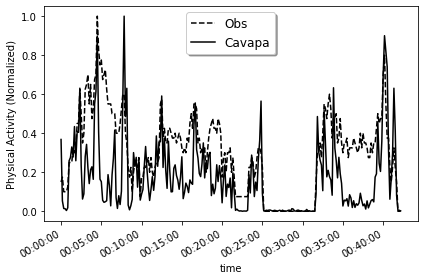

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

fig, axs = plt.subplots(1, 1)
t = pd.date_range('2020-01-01', periods=len(kilpData['Obs1']), freq='10s')
axs.plot(t, normalize(kilpData['Obs1'],0,1), 'k--', label='Obs')
axs.plot(t, normalize(kilpData['Cav'],0,1), 'k', label='Cavapa')
axs.set_xlabel('time')
axs.set_ylabel('Physical Activity (Normalized)')
fig.autofmt_xdate()
xfmt = mdates.DateFormatter('%H:%M:%S')
axs.xaxis.set_major_formatter(xfmt)
axs.legend(loc='upper center', shadow=True, fontsize='large')
fig.tight_layout()
plt.show()
